<a href="https://colab.research.google.com/github/Andre-1970/Machine_learning_classical_algorithms_Sem4/blob/main/Homework_2_8_%D0%9A%D0%BE%D0%BD%D1%86%D0%B5%D0%BF%D1%86%D0%B8%D0%B8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные концепции Machine Learning. Домашняя работа

In [3]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [6]:
### Здесь требуется загрузить датасет phones.csv ###

In [7]:
# df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Machine_learning_classical_algorithms_Sem4/data/phones.csv')
df = pd.read_csv('data/phones.csv')
df.head(5)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   disk    100 non-null    int64 
 1   os      100 non-null    object
 2   price   100 non-null    int64 
 3   year    100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [9]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

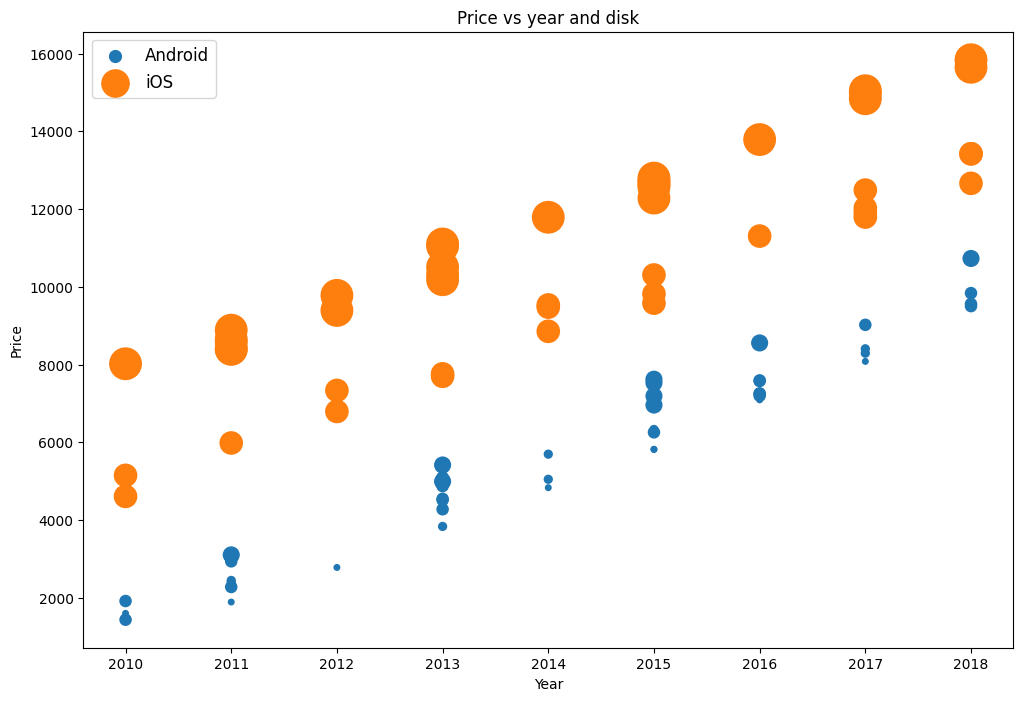

In [10]:
fig = plt.figure(figsize=(12, 8))

android_data = df[df['os'] == 'Android']
ios_data = df[df['os'] == 'iOS']

plt.scatter(android_data.year, android_data.price, s=android_data.disk, label='Android')
plt.scatter(ios_data.year, ios_data.price, s=ios_data.disk, label='iOS')

plt.title('Price vs year and disk')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(fontsize=12)
plt.show()

Задание 1: обучить модель регрессии

In [11]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 
# y =

In [12]:
# разделение признаков и целевой переменной
X = df[['disk', 'os', 'year']]
y = df['price']

# преобразование категориального признака os в числовой
X = pd.get_dummies(X, columns=['os'], drop_first=True)

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [14]:
# обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# оценка качества модели на тестовой выборке
score = model.score(X_test, y_test)
print('Score:', score)

Score: 0.9936880946855823


Задание 2: обучить модель классификации

In [15]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 
# y =

In [16]:
# разделение признаков и целевой переменной
X = df[['disk', 'price', 'year']]
y = df['os']

# преобразование категориального признака os в числовой
y = pd.get_dummies(y, columns=['os'], drop_first=True)

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [18]:
# создание модели и задание гиперпараметров и обучение модели
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# оценка качества модели на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


Задание 3: обучить модель кластеризации

In [19]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 

In [20]:
# выбор признаков
X = df[['disk', 'year']]

In [21]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

C:\___project\python\Machine_learning_classical_algorithms_Sem4\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


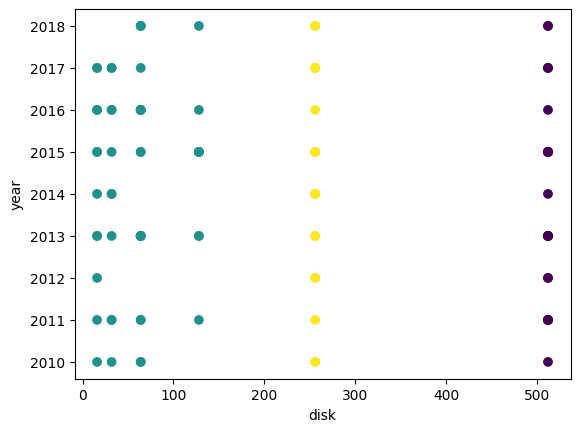

In [22]:
# создание модели и задание гиперпараметров и обучение модели
model = KMeans(n_clusters=3)
model.fit(X)

# получение меток кластеров для каждого объекта
labels = model.predict(X)

# визуализация кластеров
plt.scatter(X['disk'], X['year'], c=labels)
plt.xlabel('disk')
plt.ylabel('year')
plt.show()